# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create Dataset

In [3]:
df = pd.read_csv("ecommerce.txt")
x = np.array(df["Length of Membership"])
y = np.array(df["Yearly Amount Spent"])

print(x.shape)
print(y.shape)

(500,)
(500,)


# Data frame Overview

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Plot Data

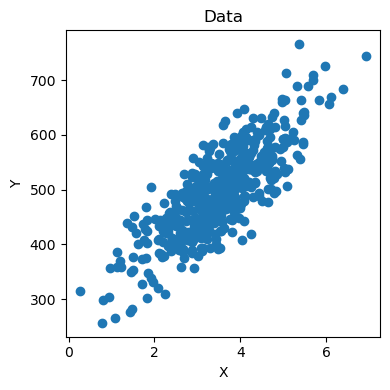

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

axs.set_title("Data")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.plot(x, y, 'o')

plt.tight_layout()
plt.show()

# Some rows of data

In [22]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


# Normalizing Data

In [24]:
x = np.array([i / max(x) for i in x])
y = np.array([i / max(y) for i in y])

# F

In [25]:
def F(x, w, b):
    return x * w + b

# Cost Function

In [26]:
def cost(x, y, w, b):
    m = x.shape[0]
    return np.sum((F(x, w, b) - y) ** 2) / (2 * m)

# Compute Gradient

In [27]:
def gradient(x, y, w, b):
    m = x.shape[0]

    f = F(x, w, b) - y
    d_dw = np.sum(f * x) / m
    d_db = np.sum(f) / m

    return d_dw, d_db

# Gradient Descent

In [29]:
def gradient_descent(x, y, w_in, b_in, iterations, a, cost_function=None, compute_gradient=None):
    cost_history={}
    w, b = w_in, b_in
    for _ in range(iterations+1):
        d_dw, d_db = compute_gradient(x, y, w, b)
        w -= a * d_dw
        b -= a * d_db

        cost = cost_function(x, y, w, b)
        if _ % 100 == 0:
            print(f"iteration: {_}\t|cost: {cost}")
        cost_history[_] = cost

    return w, b, cost_history

# Running Gradient Descent

In [30]:
w_in = 0
b_in = 0
iterations = 1_000
alpha = 1
w, b, cost_history = gradient_descent(
    x,
    y,
    w_in,
    b_in,
    iterations,
    alpha,
    cost_function=cost,
    compute_gradient=gradient,
)

print(f"\nOptimum Result -->\nw: {w}\nb: {b}")

iteration: 0	|cost: 0.017932408688698498
iteration: 100	|cost: 0.0018858150869170173
iteration: 200	|cost: 0.0018514145032779825
iteration: 300	|cost: 0.0018501650163057742
iteration: 400	|cost: 0.001850119632840479
iteration: 500	|cost: 0.0018501179844367995
iteration: 600	|cost: 0.001850117924564009
iteration: 700	|cost: 0.0018501179223893288
iteration: 800	|cost: 0.001850117922310341
iteration: 900	|cost: 0.0018501179223074722
iteration: 1000	|cost: 0.001850117922307368

Optimum Result -->
w: 0.5807384253582762
b: 0.3558370010774091


# Plot Output

Text(0.5, 1.0, 'cost per iteration')

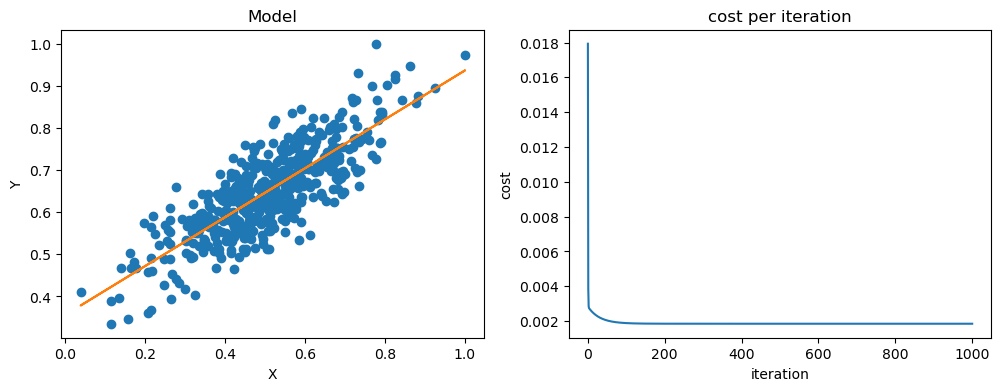

In [31]:
fig, (ex1, ex2) = plt.subplots(1,2, figsize=(12,4))

ex1.plot(x, y, 'o')
y_hat = w * x + b
ex1.plot(x, y_hat)
ex1.set_xlabel("X")
ex1.set_ylabel("Y")
ex1.set_title("Model")

ex2.plot(list(cost_history.keys()), list(cost_history.values()))
ex2.set_xlabel("iteration")
ex2.set_ylabel("cost")
ex2.set_title("cost per iteration")

# Accuracy

In [32]:
def accuracy(X, Y):
    sum = 0
    length = len(X)
    for i in range(length):
        model_output = round(F(X[i], w, b), 2)
        actual_output = Y[i]
        if i % 20 == 0:
            print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - (abs(model_output - actual_output) / actual_output)) * 100
    return sum/length

accuracy_final = accuracy(x, y)
print(f"\n\n***********************\n*** Accuracy {round(accuracy_final, 2)}% ***\n***********************")

0.5897448860359474 -> model -> 0.7	|	actual output -> 0.7680429450117902
0.6644725965579101 -> model -> 0.74	|	actual output -> 0.6984883714649645
0.6747775661786346 -> model -> 0.75	|	actual output -> 0.6959359101967706
0.6701615668895631 -> model -> 0.75	|	actual output -> 0.8057957497254946
0.541947553980428 -> model -> 0.67	|	actual output -> 0.639844121794147
0.46002622788567094 -> model -> 0.62	|	actual output -> 0.6767499201415766
0.47565295844069755 -> model -> 0.63	|	actual output -> 0.75283772505244
0.5718720099615188 -> model -> 0.69	|	actual output -> 0.5864434569881645
0.47801976484704745 -> model -> 0.63	|	actual output -> 0.6125436872343509
0.6823977230808207 -> model -> 0.75	|	actual output -> 0.675575000874764
0.2774522133262408 -> model -> 0.52	|	actual output -> 0.6595143781571008
0.5313815514350205 -> model -> 0.66	|	actual output -> 0.6784591131687839
0.3570506417513894 -> model -> 0.56	|	actual output -> 0.5201226205899971
0.5677873347169289 -> model -> 0.69	|	act